# EDA - Project  
The target of the project is to track the impact of living conditions of students aged 15 to 22 on their performance in mathematics in order to identify students at an early stage at risk.
And this can be done using a model that would predict the results of the state exam in mathematics for each student of the school. To determine the parameters of the future model, it's necessary to conduct an exploratory analysis of the data and draw up a report on its results.


# Part  I: Imports and Data Cleaning 

In [1]:
# Libraries
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from itertools import combinations
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Show more rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Splitting data into training and testing


# Loading data
stud = pd.read_csv('stud_math.csv')

Have a check on the data after reading in the data.

In [2]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [3]:
print(f'The dataset has {stud.shape[0]} rows and {stud.shape[1]} columns.')

The dataset has 395 rows and 30 columns.


There are 13 continuous and 17 categorical variables.

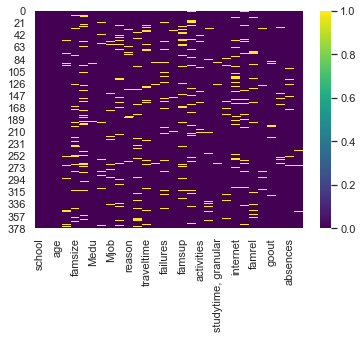

In [4]:
sns.heatmap(stud.isnull(), cmap='viridis')

It's visible: it's necessary to clean the data and to feel the missing values.  
Let's start!

At first we rename the columns to make the analyse easier.

In [5]:
stud.columns = [x.lower() for x in stud.columns]
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

To bild and optimizate our model we will use a dictionary "model_structure" :   

- keys: names of the data set columns;  


- values:  
List[0]:  
    1 - the column/parameter will be used for the data model    
    0 - the column/parameter won't be used for the data model)  
List[1]:   
    0 - categorical variable  
    1 - quantitative variable

In [6]:
model_structure = {}
for col in stud.columns:
    if stud[col].dtype == 'O':
        dtype = 0  # categorical variable
    else:
        dtype = 1  # quantitative variable
    model_structure.setdefault(col, [1, dtype])
model_structure

{'school': [1, 0],
 'sex': [1, 0],
 'age': [1, 1],
 'address': [1, 0],
 'famsize': [1, 0],
 'pstatus': [1, 0],
 'medu': [1, 1],
 'fedu': [1, 1],
 'mjob': [1, 0],
 'fjob': [1, 0],
 'reason': [1, 0],
 'guardian': [1, 0],
 'traveltime': [1, 1],
 'studytime': [1, 1],
 'failures': [1, 1],
 'schoolsup': [1, 0],
 'famsup': [1, 0],
 'paid': [1, 0],
 'activities': [1, 0],
 'nursery': [1, 0],
 'studytime, granular': [1, 1],
 'higher': [1, 0],
 'internet': [1, 0],
 'romantic': [1, 0],
 'famrel': [1, 1],
 'freetime': [1, 1],
 'goout': [1, 1],
 'health': [1, 1],
 'absences': [1, 1],
 'score': [1, 1]}

One more thing:  
due to a lot of columns it makes sense to define some functions:

In [7]:
# first check of the columns:
def first_acquaintance(column, df=stud, times=10):
    print(
        f'There are {df[column].isnull().sum()} missing values in the column "{column}":')
    print(
        f'\nThere are {df[column].nunique()} unique values:')
    sns.countplot(x=column, data=df)
    # df[column].hist()
    print(df[column].value_counts())
    print(f'\nValues that appear in the column more then {times} times:', (
        df[column].value_counts() > times).sum())
    print('\nGenerate descriptive statistics:\n', df[column].describe())

In [8]:
# depicting a numerical column through its quartiles.
def quartile_analysis(column, df=stud, bins_hist=10):
    median = df[column].median()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    print(
        f'25th quantile: {perc25}\n 75th quantile: {perc75}\n IQR: {IQR}\n limits of outliers: [{perc25-1.5*IQR}, {perc75+1.5*IQR}]')
    df[column].loc[df[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
        bins=bins_hist, range=(df[column].min()*0.9, df[column].max()*1.1), label='IQR')
    df[column].loc[~df[column].between(perc25-1.5*IQR, perc75+1.5*IQR)].hist(
        bins=bins_hist, range=(df[column].min()*0.9, df[column].max()*1.1), label='Outliers')
    plt.legend()

In [9]:
#  visual distribution of score-variable across several levels of one categorical variables in the column (function argument).
def violin_plot(column, df=stud):
    sns.violinplot(x=column, y='score', data=df)


def bar_plot(column, df=stud):
    sns.barplot(x=column, y='score', data=df)

In [10]:
# Plot of distribution of scores for categorical variables
def kdeplot_score(column, df=stud):
    types = list(stud[column].unique())

    # Plot for each unique value in column
    for n in types:
        subset = df[df[column] == n]
        sns.kdeplot(subset['score'], label=n, shade=False)

    # label the plot
    plt.xlabel('Score', size=16)
    plt.ylabel('Density', size=16)
    plt_title = 'Density Plot of Scores by ' + column
    plt.title(plt_title, size=20)

In [11]:
# filling missing values of a categorical variable with some string
def fill_unknown(x): return 'unknown' if pd.isna(x) else x
def fill_yes(x): return 'yes' if pd.isna(x) else x
def fill_no(x): return 'no' if pd.isna(x) else x

Due to the column "score" has a missing values I would like to start from this column to optimize a further data exploration:

# Column "score"
## - math exam score

There are 6 missing values in the column "score":

There are 18 unique values:
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Values that appear in the column more then 10 times: 12

Generate descriptive statistics:
 count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


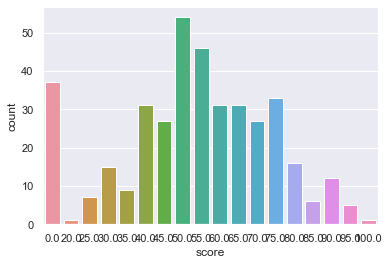

In [12]:
a_column = 'score'  # name of the column in the working
first_acquaintance(a_column)

25th quantile: 40.0
 75th quantile: 70.0
 IQR: 30.0
 limits of outliers: [-5.0, 115.0]


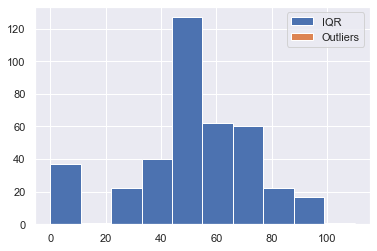

In [13]:
quartile_analysis(a_column)

Although statistically the 0-value is not an outlier,  but common sense would suggest that the studens  
who has 0 as score (as well as who has missing value) didn't take part in the exam.  
Therefor there is no reason to replace them, as it could distort the model.      
My opinion is to filter them out from the data set. 

In [14]:
stud[a_column] = stud[a_column].apply(lambda x: 0.0 if pd.isna(x) else x)
stud = stud.loc[(stud.score != 0.0)]
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
school                 352 non-null object
sex                    352 non-null object
age                    352 non-null int64
address                338 non-null object
famsize                328 non-null object
pstatus                311 non-null object
medu                   350 non-null float64
fedu                   331 non-null float64
mjob                   335 non-null object
fjob                   320 non-null object
reason                 337 non-null object
guardian               323 non-null object
traveltime             329 non-null float64
studytime              345 non-null float64
failures               332 non-null float64
schoolsup              343 non-null object
famsup                 316 non-null object
paid                   316 non-null object
activities             340 non-null object
nursery                340 non-null object
studytime, granular    345 non-

There are 0 missing values in the column "score":

There are 17 unique values:
50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Values that appear in the column more then 10 times: 11

Generate descriptive statistics:
 count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


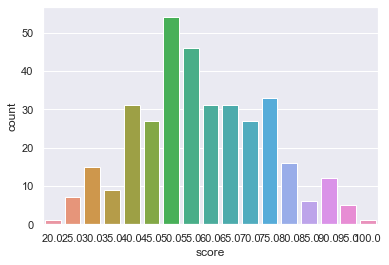

In [15]:
first_acquaintance(a_column, df=stud)

25th quantile: 45.0
 75th quantile: 70.0
 IQR: 25.0
 limits of outliers: [7.5, 107.5]


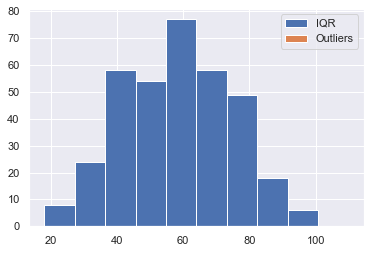

In [16]:
quartile_analysis(a_column, df=stud)

There are no outliers, no missing values. We can analyse other variables.

# Column "school"
## - school abbreviation

There are 0 missing values in the column "school":

There are 2 unique values:
GP    311
MS     41
Name: school, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top        GP
freq      311
Name: school, dtype: object


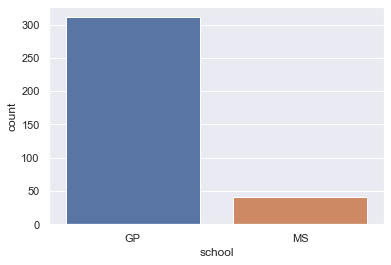

In [17]:
a_column = 'school'  # name of the column in the working
first_acquaintance(a_column, df=stud)

There are no missing values in this column.  
Only two unique value: GP and  MS.   
The variable seems not very informative, so I would like to check some idea to deside if it's necessary to keep the columns for the next analysis.

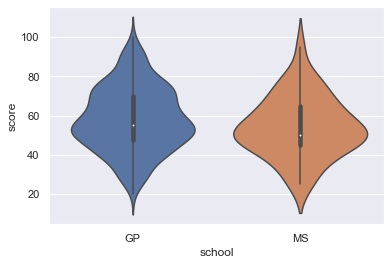

In [18]:
violin_plot(a_column, df=stud)

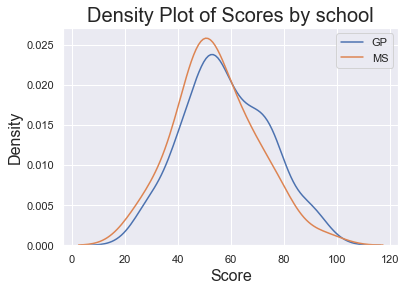

In [19]:
kdeplot_score(a_column, df=stud)

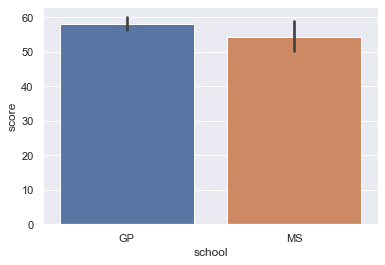

In [20]:
bar_plot(a_column, df=stud)

I suppose, we can exclude the parameter "school" from the data model   
due to there is no essential differences of the score  values in these two school.  
It means the parameter "school" doesn't affect the score. 
But we don't drop the column immediately, as it could help to fill missing values in another columns (for instance "adress", "reason')

In [21]:
model_structure[a_column][0] = 0

# Column "sex"
## - student gender

There are 0 missing values in the column "sex":

There are 2 unique values:
F    182
M    170
Name: sex, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top         F
freq      182
Name: sex, dtype: object


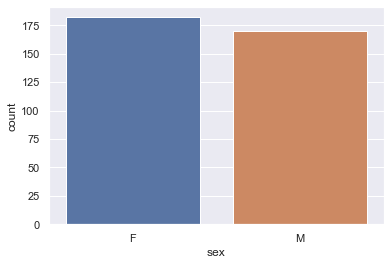

In [22]:
a_column = 'sex'
first_acquaintance(a_column, df=stud)

There are no missing values in this column.  
Only two unique value: F (female) and M (male).

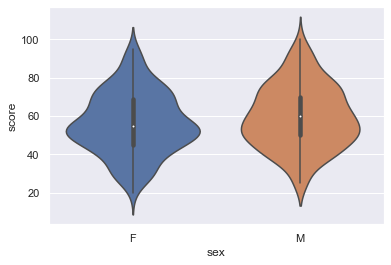

In [23]:
violin_plot(a_column, df=stud)

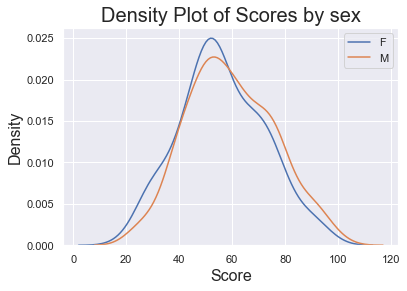

In [24]:
kdeplot_score(a_column, df=stud)

Although there is no essential differences of the score values 
for the present I wouldn't like to recomend to  exclude the parameter "sex" from the data model
due to it could be an essencial parameter in the combination with othes parameters of the model for the score-value.  
Who knows, may be We will change our opinion later.

# Column "age"  
## - student age

There are 0 missing values in the column "age":

There are 8 unique values:
16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


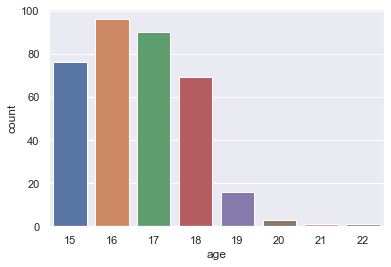

In [25]:
a_column = 'age'
first_acquaintance(a_column, df=stud)

There are no missing values in this column.  
The skewness is light positive, the data are positively skewed.   
Let's analyse the quantiles and outliers:

25th quantile: 16.0
 75th quantile: 18.0
 IQR: 2.0
 limits of outliers: [13.0, 21.0]


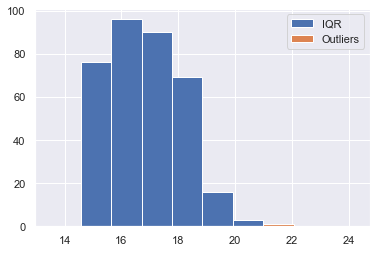

In [26]:
quartile_analysis(a_column, df=stud)

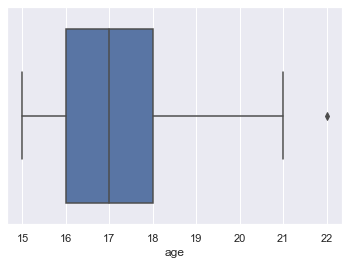

In [27]:
sns.boxplot(stud[a_column])

Value 22 seems as outlier, but according to the description  of our data set the age of the students is between 15 and 22 years, therefore we don't need to process a value 22.

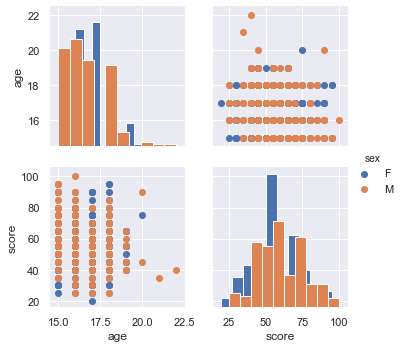

In [28]:
g = sns.PairGrid(stud, vars=["age", "score"], hue='sex')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [29]:
stud.pivot_table(values=['score'], index=['age'],
                 columns=['sex'], aggfunc='mean', margins=True)

score                      
sex          F          M        All
age                                 
15   53.382353  66.666667  60.723684
16   55.900000  62.826087  59.218750
17   57.358491  53.918919  55.944444
18   57.500000  54.571429  56.014493
19   54.000000  50.833333  52.812500
20   75.000000  67.500000  70.000000
21         NaN  35.000000  35.000000
22         NaN  40.000000  40.000000
All  56.153846  59.470588  57.755682

I would like to recommend to include the variable "age" in the model, it could help to predict the score in dynamic and prevent the score worsening ih certain age.

# Column "address"
type of the student adress:  
"U" - city   
"R" -  in the countryside.

There are 14 missing values in the column "address":

There are 2 unique values:
U    265
R     73
Name: address, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     338
unique      2
top         U
freq      265
Name: address, dtype: object


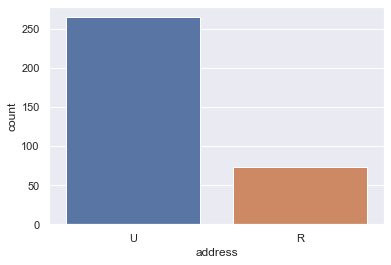

In [30]:
a_column = 'address'
first_acquaintance(a_column, df=stud)

To fill the missing values let's analyse values in columns "school", "reason" and "traveltime") 

In [31]:
# analyse the rows with missing "address"
stud[pd.isna(stud['address'])][['school', 'address', 'reason', 'traveltime']]

,school,address,reason,traveltime
6,GP,NaN,home,1.0
52,GP,NaN,other,2.0
75,GP,NaN,home,1.0
92,GP,NaN,home,1.0
96,GP,NaN,reputation,2.0
159,GP,NaN,course,1.0
241,GP,NaN,course,NaN
254,GP,NaN,course,1.0
292,GP,NaN,reputation,1.0
348,GP,NaN,reputation,NaN


To fill the missing "address"-values we will  compare the "travletime" with the the mean traveltime for appropriate "school"  
to the students for both "address" - types "R" and "U", and besides we will make it separat for "reason"="home" and for anothers.  
"R" or "U" will be filled depending on to which mean traveltime will be closer the appropriate value in the row with missing traveltime.

In [32]:
df = stud.pivot_table(['traveltime'], ['school', 'reason'], 'address')
df

traveltime          
address                    R         U
school reason                         
GP     course       1.789474  1.424658
       home         1.875000  1.272727
       other        1.000000  1.150000
       reputation   1.500000  1.328125
MS     course       2.000000  1.428571
       home         3.500000  1.500000
       other        2.400000  2.000000
       reputation   2.000000  2.000000

In [33]:
df1 = stud[stud['reason'] != 'home'].pivot_table(
    ['traveltime'], ['school'], 'address')
df1

traveltime          
address          R         U
school                      
GP        1.595238  1.329341
MS        2.062500  1.538462

In [34]:
# the function to fill the missing "address"-values
def fill_address(row):
    if pd.isnull(row['address']):
        if not(pd.isnull(row['traveltime'])):
            school = row['school']
            reason = row['reason']
            traveltime = row['traveltime']
            if reason == 'home':
                diff_tt_R = abs(
                    traveltime - df.loc[(school, reason)][('traveltime', 'R')])
                diff_tt_U = abs(
                    traveltime - df.loc[(school, reason)][('traveltime', 'U')])
                if diff_tt_R <= diff_tt_U:
                    return 'R'
                else:
                    return 'U'
            else:
                diff_tt_R = abs(
                    traveltime - df1.loc[(school)][('traveltime', 'R')])
                diff_tt_U = abs(
                    traveltime - df1.loc[(school)][('traveltime', 'U')])
                if diff_tt_R <= diff_tt_U:
                    return 'R'
                else:
                    return 'U'
        else:
            return 'U'
    return row['address']

In [35]:
stud.address = stud.apply(fill_address, axis=1)

There are 0 missing values in the column "address":

There are 2 unique values:
U    275
R     77
Name: address, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top         U
freq      275
Name: address, dtype: object


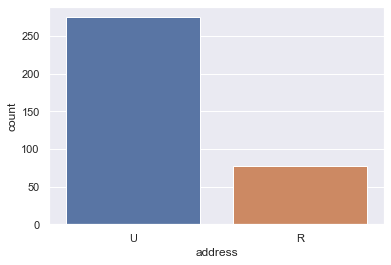

In [36]:
first_acquaintance(a_column, df=stud)

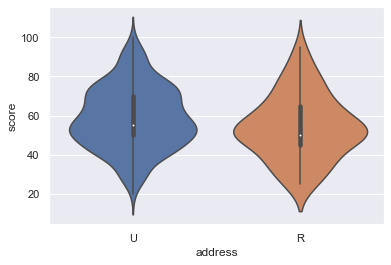

In [37]:
violin_plot(a_column, df=stud)

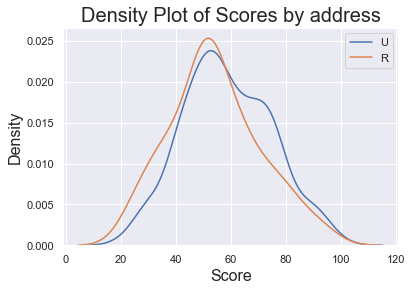

In [38]:
kdeplot_score(a_column, df=stud)

# Column "famsize"
## family size: 'LE3' <= 3, 'GT3' >3

There are 24 missing values in the column "famsize":

There are 2 unique values:
GT3    228
LE3    100
Name: famsize, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     328
unique      2
top       GT3
freq      228
Name: famsize, dtype: object


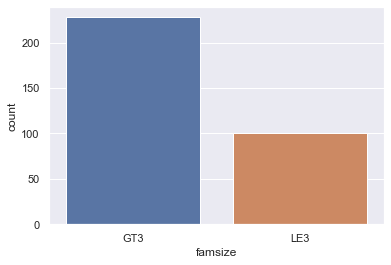

In [39]:
a_column = 'famsize'
first_acquaintance(a_column, df=stud)

It seems not right to fill the missing values with one of the both "GT3" or "LE3", as there is no appropriate information to make a choice.  
Let's fill the missing values with a new categorial value: "unknown".


In [40]:
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "famsize":

There are 3 unique values:
GT3        228
LE3        100
unknown     24
Name: famsize, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count     352
unique      3
top       GT3
freq      228
Name: famsize, dtype: object


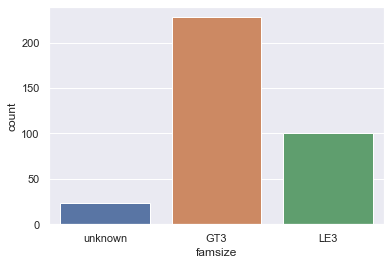

In [41]:
a_column = 'famsize'
first_acquaintance(a_column, df=stud)

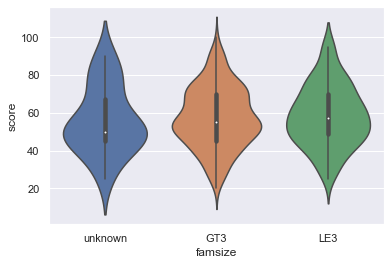

In [42]:
violin_plot(a_column, df=stud)

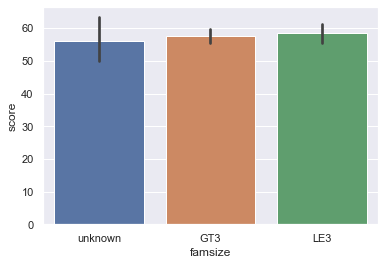

In [43]:
bar_plot(a_column, df = stud)

# Column "pstatus"
Cohabitation status of parents ("T" - together, "A" - separately)

There are 41 missing values in the column "pstatus":

There are 2 unique values:
T    277
A     34
Name: pstatus, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     311
unique      2
top         T
freq      277
Name: pstatus, dtype: object


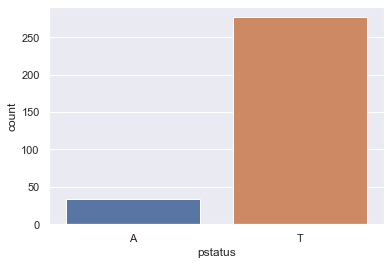

In [44]:
a_column = 'pstatus'
first_acquaintance(a_column, df=stud)

Let's fill the missing values with a new categorial value: "unknown". due to no information to fill it with "T" or "A"

In [45]:
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "pstatus":

There are 3 unique values:
T          277
unknown     41
A           34
Name: pstatus, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count     352
unique      3
top         T
freq      277
Name: pstatus, dtype: object


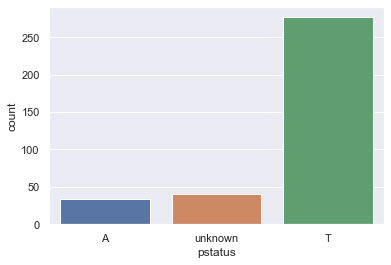

In [46]:
first_acquaintance(a_column, df=stud)

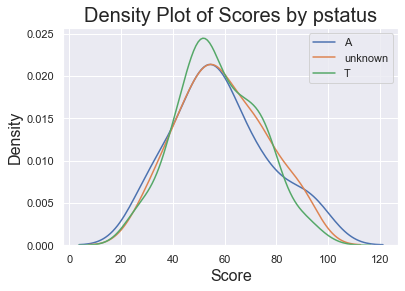

In [47]:
kdeplot_score(a_column, df=stud)

# Column "medu"
## mother education: 
0 - no, 1 - 4 school class, 2 - 5-9 school class, 3 - secondary special education or 11 school class, 4 - higher education

There are 2 missing values in the column "medu":

There are 5 unique values:
4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: medu, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64


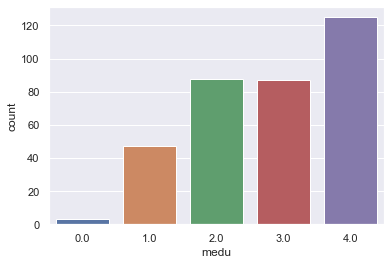

In [48]:
a_column = 'medu'
first_acquaintance(a_column, df=stud)

Let's see a mother "job"-values for the missing "medu"-values

In [49]:
stud[stud['medu'].isna()][['medu', 'mjob']]

,medu,mjob
92,NaN,other
193,NaN,services


In [50]:
st_mjob_mean = stud.groupby(['mjob'])['medu'].mean().round(0)
st_mjob_mean

mjob
at_home     2.0
health      4.0
other       3.0
services    3.0
teacher     4.0
Name: medu, dtype: float64

In [51]:
# Function to fill data of education level (medu) with the mean value for appropriate  job-value(mjob)
def func_fill_edu(row):
    if pd.isnull(row['medu']):
        mjob = row['mjob']
        return st_mjob_mean[mjob]
    return row['medu']

In [52]:
stud.medu = stud.apply(func_fill_edu, axis=1)

There are 0 missing values in the column "medu":

There are 5 unique values:
4.0    125
3.0     89
2.0     88
1.0     47
0.0      3
Name: medu, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    352.000000
mean       2.812500
std        1.088171
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64


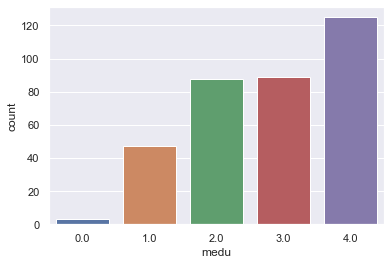

In [53]:
first_acquaintance(a_column, df=stud)

25th quantile: 2.0
 75th quantile: 4.0
 IQR: 2.0
 limits of outliers: [-1.0, 7.0]


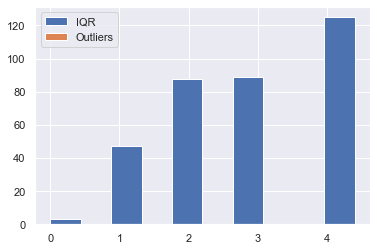

In [54]:
quartile_analysis(a_column, df=stud)

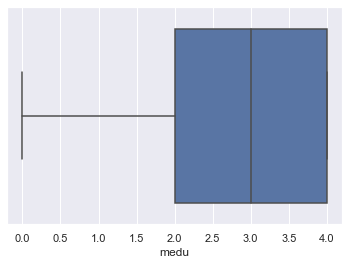

In [55]:
sns.boxplot(stud[a_column])

In [56]:
stud[stud['medu'] == 0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0


I suppose we can consider the 0-value in column "medu" as outliers/mistake and replace them for instance with mean values for appropriate "mjob"-values.

In [57]:
def func_fill_edu_0(row):
    if row['medu'] == 0:
        mjob = row['mjob']
        return st_mjob_mean[mjob]
    return row['medu']

In [58]:
stud.medu = stud.apply(func_fill_edu_0, axis=1)

There are 0 missing values in the column "medu":

There are 4 unique values:
4.0    125
2.0     90
3.0     90
1.0     47
Name: medu, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    352.000000
mean       2.832386
std        1.058288
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64


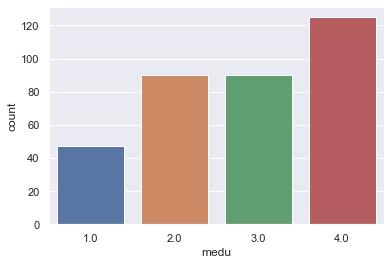

In [59]:
first_acquaintance(a_column, df=stud)

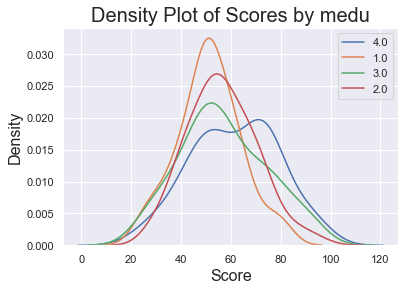

In [60]:
kdeplot_score(a_column, df=stud)

 From this graph, we can see that the education from mother does have an effect on the score.   
 We will consider this variable as categorical:

In [61]:
model_structure[a_column][1] = 0

# Column "fedu"
## father education:
0 - no, 1 - 4 school class, 2 - 5-9 school class, 3 - secondary special education or 11 school class, 4 - higher education

There are 21 missing values in the column "fedu":

There are 6 unique values:
2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: fedu, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64


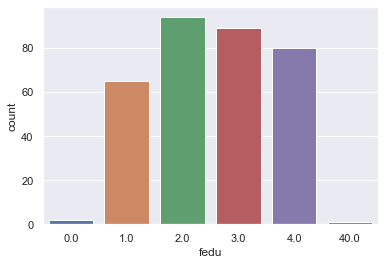

In [62]:
a_column = 'fedu'
first_acquaintance(a_column, df=stud)

It's obviously that value 40.0 is a tip mistake, and it should be replaced doubtless with 4.0:

In [63]:
stud.fedu = stud.fedu.replace(40, 4)

Let's see a father "job"-values for the missing "fedu"-values

In [64]:
stud[stud['fedu'].isna()][['fedu', 'fjob']]

,fedu,fjob
21,NaN,health
42,NaN,teacher
46,NaN,services
57,NaN,health
58,NaN,at_home
67,NaN,other
142,NaN,services
159,NaN,services
161,NaN,NaN
180,NaN,other


In [65]:
st_fjob_mean = stud.groupby(['fjob'])['fedu'].mean().round(0)
st_fjob_mean

fjob
at_home     2.0
health      3.0
other       2.0
services    3.0
teacher     4.0
Name: fedu, dtype: float64

In [66]:
# Function to fill data of education level (fedu) with the mean value for appropriate  job-value(fjob)
def func_fill_fedu(row):
    if pd.isnull(row['fedu']):
        if pd.notnull(row['fjob']):
            fjob = row['fjob']
            return st_fjob_mean[fjob]
        else:
            return stud['fedu'].median()
    return row['fedu']

In [67]:
stud.fedu = stud.apply(func_fill_fedu, axis=1)

Let's chek the 0-values of "fedu":

In [68]:
stud[stud['fedu']==0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,unknown,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


I suppose we can consider the 0-value in column "fedu" as outliers/mistake and replace them with the mean values for appropriate "mjob"-values.

In [69]:
def func_fill_fedu_0(row):
    if row['fedu'] == 0:
        mjob = row['fjob']
        return st_fjob_mean[mjob]
    return row['fedu']

In [70]:
stud.fedu = stud.apply(func_fill_fedu_0, axis=1)

There are 0 missing values in the column "fedu":

There are 4 unique values:
2.0    104
3.0     99
4.0     84
1.0     65
Name: fedu, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    352.000000
mean       2.573864
std        1.046061
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64


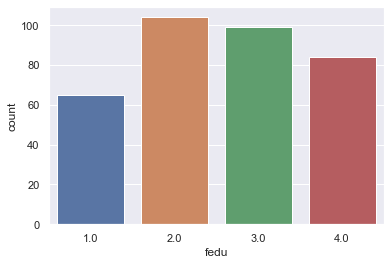

In [71]:
first_acquaintance(a_column, df=stud)

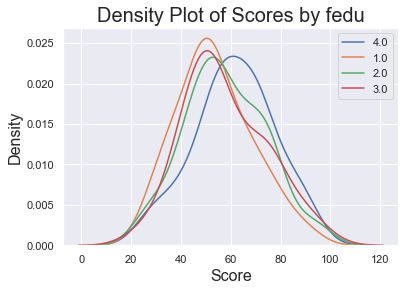

In [72]:
kdeplot_score(a_column, df=stud)

The education of fathers does not seem to make as significant a difference in the distribution of the score as does the mother  education. Nonetheless, it might make sense to include the father education as a categorical variable.

In [73]:
model_structure[a_column][1] = 0

# Column "mjob"
## mother job


There are 17 missing values in the column "mjob":

There are 5 unique values:
other       115
services     90
teacher      51
at_home      49
health       30
Name: mjob, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count       335
unique        5
top       other
freq        115
Name: mjob, dtype: object


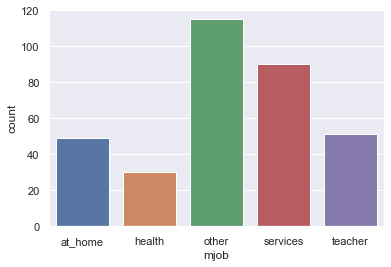

In [74]:
a_column = 'mjob'
first_acquaintance(a_column, df=stud)

In [75]:
# let's analyse and fill the missing values
stud[stud[a_column].isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,unknown,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,unknown,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0
177,GP,M,17,U,GT3,T,3.0,3.0,NaN,other,reputation,father,1.0,2.0,0.0,no,no,no,yes,no,-6.0,yes,yes,no,4.0,3.0,4.0,4.0,4.0,30.0


In [76]:
st_medu = (stud.groupby(['medu'])['mjob'].value_counts())
st_medu

medu  mjob    
1.0   at_home     22
      other       18
      services     4
      health       1
2.0   other       39
      services    27
      at_home     19
      health       2
3.0   other       36
      services    36
      at_home      6
      health       4
      teacher      3
4.0   teacher     48
      health      23
      services    23
      other       22
      at_home      2
Name: mjob, dtype: int64

In [77]:
# Function to fill the missing values of  the job ("mjob") with the most common value for appropriate education-level(medu)
def func_fill_mjob(row):
    if pd.isnull(row['mjob']):
        medu = row['medu']
        return st_medu[medu].index[0]
    return row['mjob']

In [78]:
stud.mjob = stud.apply(func_fill_mjob, axis=1)

There are 0 missing values in the column "mjob":

There are 5 unique values:
other       123
services     90
teacher      58
at_home      51
health       30
Name: mjob, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count       352
unique        5
top       other
freq        123
Name: mjob, dtype: object


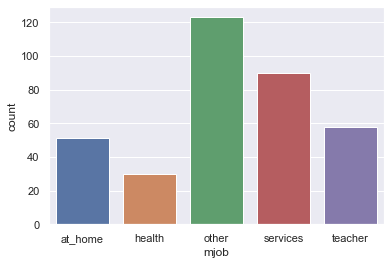

In [79]:
first_acquaintance(a_column, df=stud)

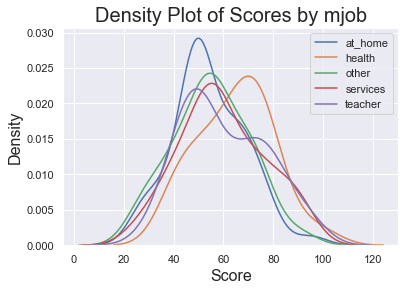

In [80]:
kdeplot_score(a_column, df=stud)

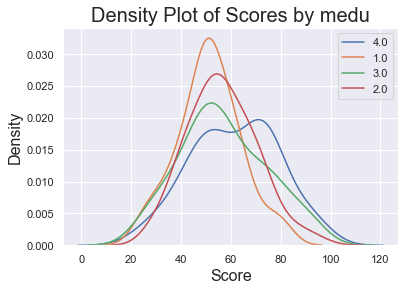

In [81]:
kdeplot_score('medu', df=stud)

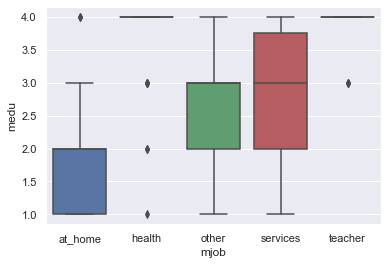

In [82]:
sns.boxplot(x='mjob', y='medu',  data=stud)

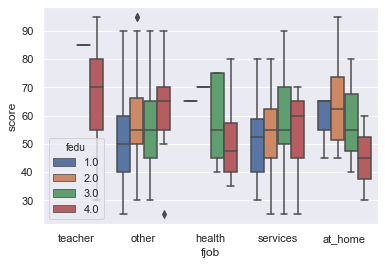

In [83]:
sns.boxplot(x='fjob', y='score', hue='fedu',  data=stud)

# Column "fjob"
## - father job

There are 32 missing values in the column "fjob":

There are 5 unique values:
other       176
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count       320
unique        5
top       other
freq        176
Name: fjob, dtype: object


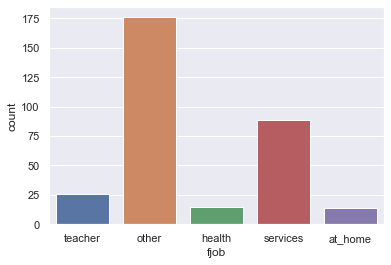

In [84]:
a_column = 'fjob'
first_acquaintance(a_column, df=stud)

In [85]:
# let's analyse and fill the missing values
stud[stud[a_column].isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,R,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,teacher,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


In [86]:
st_fedu = (stud.groupby(['fedu'])['fjob'].value_counts())
st_fedu

fedu  fjob    
1.0   other       40
      services    16
      at_home      3
      health       1
2.0   other       60
      services    23
      at_home      6
      health       1
3.0   other       48
      services    33
      health       5
      at_home      3
      teacher      1
4.0   other       28
      teacher     25
      services    17
      health       8
      at_home      2
Name: fjob, dtype: int64

We can see, that "other' is the  most common meanin for all "fedu"-values.
Let's replace the missing values with "other"

In [87]:
stud.fjob = stud.fjob.apply(lambda x: "other" if pd.isna(x) else x)

There are 0 missing values in the column "fjob":

There are 5 unique values:
other       208
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count       352
unique        5
top       other
freq        208
Name: fjob, dtype: object


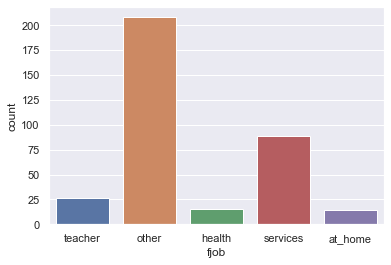

In [88]:
first_acquaintance(a_column, df=stud)

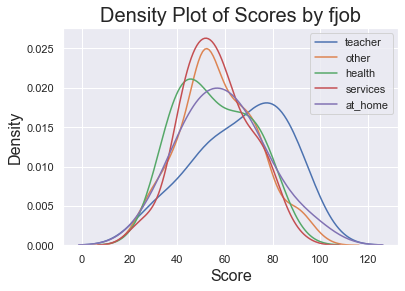

In [89]:
kdeplot_score(a_column, df=stud)

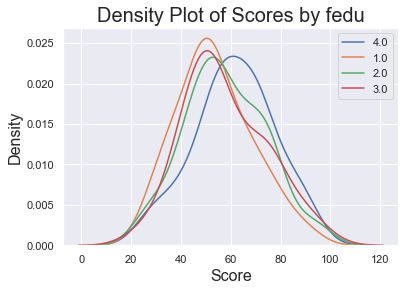

In [90]:
kdeplot_score('fedu', df=stud)

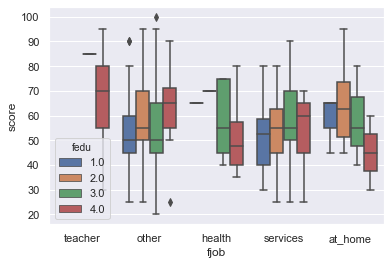

In [91]:
sns.boxplot(x='fjob', y='score', hue='fedu', data=stud)

it's interesting that the highest level of father education doesn't show the highest mean score and depends on the father job. So i will recomend to include both variables: "fedu" and "fjob" in model. 

# Column "reason"
## - the reason of the choosing a school:
'home' - close to a home, 'reputation' - reputation of the school, 'course' - education programm, 'other' - other

There are 15 missing values in the column "reason":

There are 4 unique values:
course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count        337
unique         4
top       course
freq         119
Name: reason, dtype: object


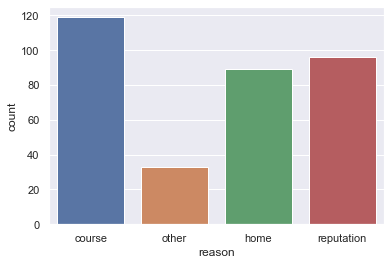

In [92]:
a_column = 'reason'
first_acquaintance(a_column, df=stud)

I would like to fill the missing values with the meaning "unknown" to prevent the distortion of the model

In [93]:
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "reason":

There are 5 unique values:
course        119
reputation     96
home           89
other          33
unknown        15
Name: reason, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count        352
unique         5
top       course
freq         119
Name: reason, dtype: object


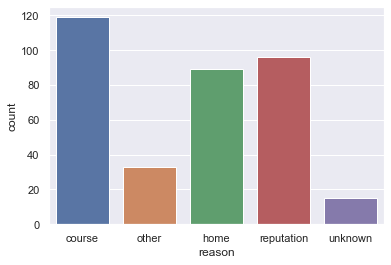

In [94]:
first_acquaintance(a_column, df=stud)

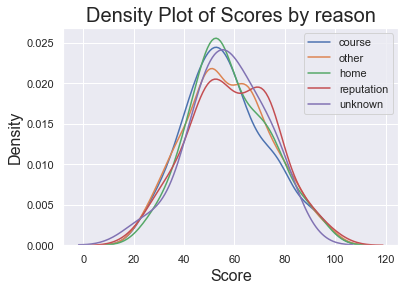

In [95]:
kdeplot_score(a_column, df=stud)

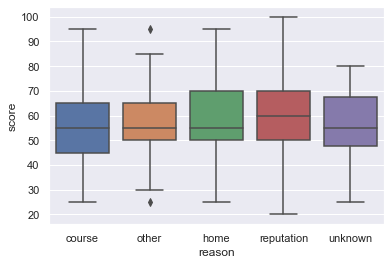

In [96]:
sns.boxplot(x=a_column, y='score', data=stud)

The "reason" does not seem to make as significant a difference in the distribution of the score. 

# Column "guardian"
## - 'mother' , 'father' , 'other' 

There are 29 missing values in the column "guardian":

There are 3 unique values:
mother    225
father     78
other      20
Name: guardian, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count        323
unique         3
top       mother
freq         225
Name: guardian, dtype: object


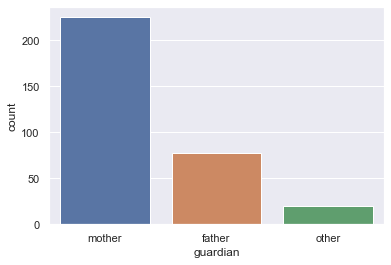

In [97]:
a_column = 'guardian'
first_acquaintance(a_column, df=stud)

I would like to fill the missing values with the meaning "unknown" to prevent the distortion of the model

In [98]:
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "guardian":

There are 4 unique values:
mother     225
father      78
unknown     29
other       20
Name: guardian, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count        352
unique         4
top       mother
freq         225
Name: guardian, dtype: object


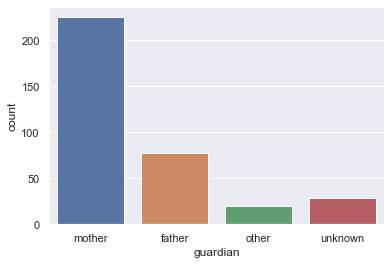

In [99]:
first_acquaintance(a_column, df=stud)

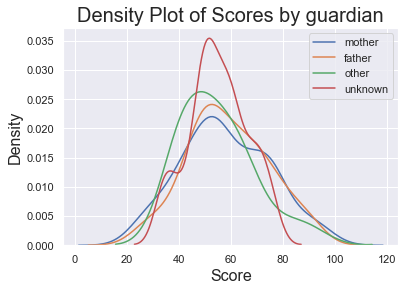

In [100]:
kdeplot_score(a_column, df=stud)

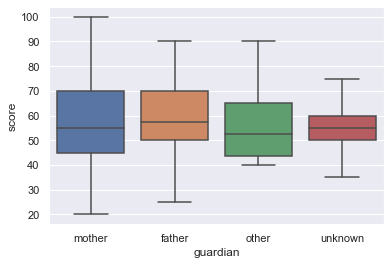

In [101]:
sns.boxplot(x=a_column, y='score', data=stud)

The "guardian" seems to make some influenca on the distribution of the score. 

# Column "traveltime"
## the time from home to school:
1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 - >60 min.

There are 23 missing values in the column "traveltime":

There are 4 unique values:
1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count    329.000000
mean       1.428571
std        0.690907
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


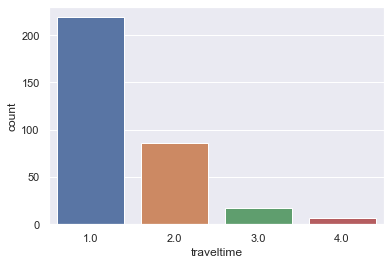

In [102]:
a_column = "traveltime"
first_acquaintance(a_column, df=stud)

In [103]:
# let's analyse and fill the missing values
stud[stud[a_column].isna()][['school', 'address', 'reason', 'traveltime']]

,school,address,reason,traveltime
26,GP,U,home,NaN
30,GP,U,home,NaN
35,GP,U,other,NaN
37,GP,R,reputation,NaN
59,GP,U,course,NaN
68,GP,R,reputation,NaN
70,GP,U,reputation,NaN
104,GP,U,course,NaN
112,GP,U,unknown,NaN
132,GP,U,course,NaN


We will use the same algorithm to fill the missing "traveltime"-values as for missing values  in the column "address":
let's analyse the DataFrame df again:


In [104]:
df = stud.pivot_table(['traveltime'], ['school', 'reason'], 'address')
df

traveltime          
address                    R         U
school reason                         
GP     course       1.789474  1.413333
       home         1.875000  1.260870
       other        1.250000  1.150000
       reputation   1.523810  1.323077
       unknown           NaN  1.000000
MS     course       2.000000  1.428571
       home         3.500000  1.600000
       other        2.400000  2.000000
       reputation   2.000000  2.000000
       unknown      1.000000  1.333333

In [105]:
# the function to fill the missing "traveltime"-values
def fill_traveltime(row):
    if pd.isnull(row['traveltime']):
        school = row['school']
        reason = row['reason']
        address = row['address']
        tt = df.loc[(school, reason)][('traveltime', address)].round(0)
        return tt
    return row['traveltime']

In [106]:
stud.traveltime = stud.apply(fill_traveltime, axis=1)

There are 0 missing values in the column "traveltime":

There are 4 unique values:
1.0    236
2.0     91
3.0     17
4.0      8
Name: traveltime, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count    352.000000
mean       1.423295
std        0.691686
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


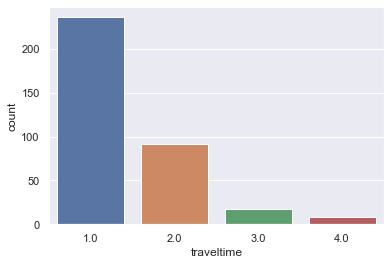

In [107]:
first_acquaintance(a_column, df=stud)

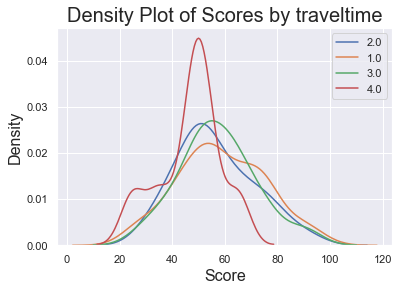

In [108]:
kdeplot_score(a_column, df=stud)

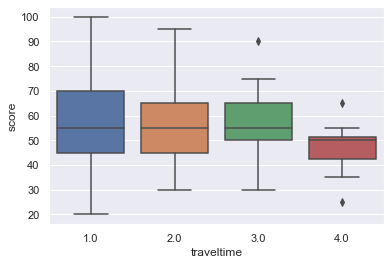

In [109]:
sns.boxplot(x=a_column, y='score', data=stud)

It seems so,  that it could be important for score if a way from home to school takes more than 60 minuts or less.  So I suppose it's better to transform this colume to two possible values: less than 60 minuts and more than 60 minuts.

In [110]:
# We will consider the column as a categorical value:
model_structure[a_column][1] = 0

# Column  "studytime'
## time for study per week (out school):
"1" - less then 2 hours, "2" - 2-5 hours, "3" - 5-10 hours, "4" - more then 10 hours

There are 7 missing values in the column "studytime":

There are 4 unique values:
2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    345.000000
mean       2.046377
std        0.840919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


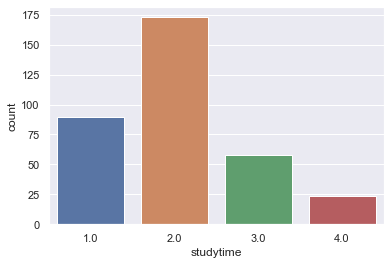

In [111]:
a_column = 'studytime'
first_acquaintance(a_column, df=stud)

In [112]:
# let's analyse and fill the missing values
a_list = [a_column, 'schoolsup', 'famsup', 'activities']
stud[stud[a_column].isna()][a_list]

,studytime,schoolsup,famsup,activities
17,NaN,yes,NaN,yes
91,NaN,no,no,yes
112,NaN,yes,no,yes
129,NaN,no,no,yes
227,NaN,no,yes,no
266,NaN,no,no,yes
314,NaN,no,no,no


In [113]:
a_list_0 = ['schoolsup', 'famsup', 'activities']
stud.groupby(a_list_0)[a_column].value_counts()

schoolsup  famsup  activities  studytime
no         no      no          1.0          20
                               2.0          16
                               3.0          10
                               4.0           2
                   yes         2.0          26
                               1.0          13
                               3.0           8
                               4.0           2
           yes     no          2.0          42
                               1.0          18
                               3.0          12
                               4.0           5
                   yes         2.0          39
                               3.0          19
                               1.0          13
                               4.0          10
yes        no      no          2.0           2
                               1.0           1
                               4.0           1
                   yes         2.0           3
           yes     

I could suggest make such filling: if one or more from ['schoolsup','famsup', 'activities'] is 'yes', then to fill as 2.0, else as 1.0: 

In [114]:
# the function to fill the missing "studytime"-values
def fill_studytime(row):
    if pd.isnull(row['studytime']):
        st_list = [row['schoolsup'], row['famsup'], row['activities']]
        if 'yes' in st_list:
            return 2.0
        else:
            return 1.0
    return row['studytime']

In [115]:
stud.studytime = stud.apply(fill_studytime, axis=1)

There are 0 missing values in the column "studytime":

There are 4 unique values:
2.0    179
1.0     91
3.0     58
4.0     24
Name: studytime, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    352.000000
mean       2.042614
std        0.834377
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


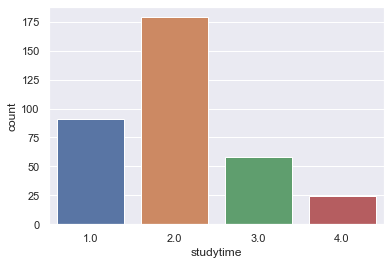

In [116]:
first_acquaintance(a_column, df=stud)

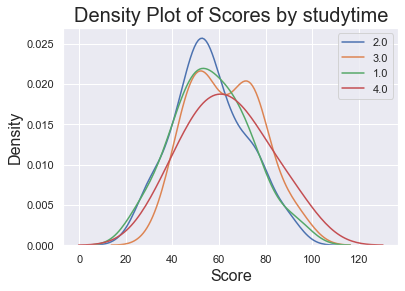

In [117]:
kdeplot_score(a_column, df=stud)

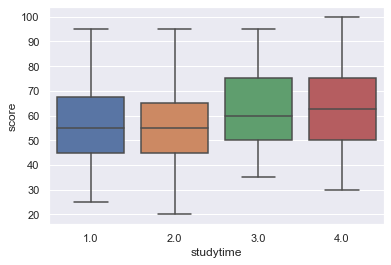

In [118]:
sns.boxplot(x=a_column, y='score', data=stud)

It seems so, that the study-time influence the score.

In [119]:
# We will consider the column as a categorical value:
model_structure[a_column][1] = 0

# Column "failures"
## - number of extracurricular failures
n, if 1<=n<=3, else 0

There are 20 missing values in the column "failures":

There are 4 unique values:
0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


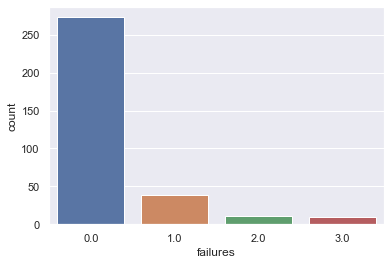

In [120]:
a_column = "failures"
first_acquaintance(a_column, df=stud)

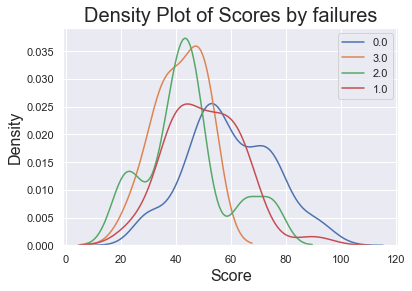

In [121]:
kdeplot_score(a_column, df=stud)

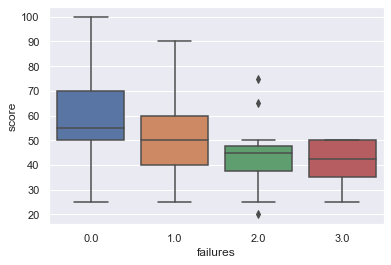

In [122]:
sns.boxplot(x=a_column, y='score', data=stud)

I have doubts that this column can be usfull due to so many numbers with value '0'.  
it's unknown how many cases are without failures and how many are with more than 4 ones.
But it could be very helpfull in case  we have separatly category for null number of extracurricular failures and for4  and more.
So I would like to suggest to exclude the column from the model without clearing and filling the missing value.

In [123]:
model_structure[a_column][0] = 0
model_structure[a_column][1] = 0

# Column "schoolsup" 
## - additional educational support ("yes" or "no")

There are 9 missing values in the column "schoolsup":

There are 2 unique values:
no     295
yes     48
Name: schoolsup, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     343
unique      2
top        no
freq      295
Name: schoolsup, dtype: object


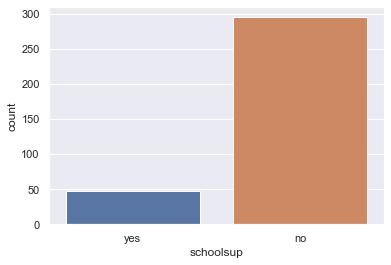

In [124]:
a_column = 'schoolsup'
first_acquaintance(a_column, df=stud)

In [125]:
stud.groupby(['school'])[a_column].value_counts()

school  schoolsup
GP      no           256
        yes           48
MS      no            39
Name: schoolsup, dtype: int64

If 'school' = 'MS" there is no additional educational support.

In [126]:
stud.loc[stud['school'] == 'GP'].groupby(
    ['activities'])[a_column].value_counts()

activities  schoolsup
no          no           120
            yes           17
yes         no           131
            yes           25
Name: schoolsup, dtype: int64

In [127]:
stud[stud[a_column].isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,unknown,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,-3.0,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,unknown,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,unknown,father,1.0,1.0,0.0,NaN,no,no,no,yes,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


In [128]:
stud[stud[a_column] == 'yes']

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,unknown,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
28,GP,M,16,U,LE3,unknown,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,unknown,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,-3.0,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,other,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0


I didn't succeed to find some other clear criteriums to fill the missing values with 'yes'. So we fill they with the "mode"-value: 'no'.

In [129]:
stud[a_column] = stud[a_column].apply(fill_no)

There are 0 missing values in the column "schoolsup":

There are 2 unique values:
no     304
yes     48
Name: schoolsup, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top        no
freq      304
Name: schoolsup, dtype: object


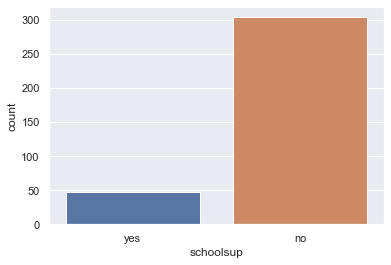

In [130]:
first_acquaintance(a_column, df=stud)

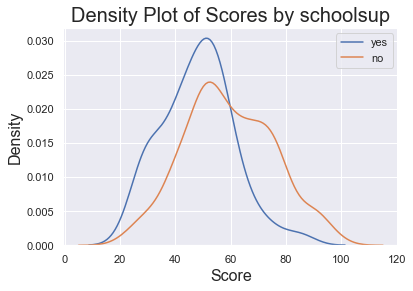

In [131]:
kdeplot_score(a_column, df=stud)

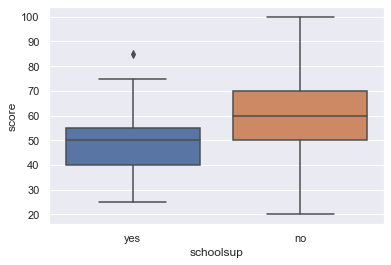

In [132]:
sns.boxplot(x=a_column, y='score', data=stud)

It seems as by "studytime" a little bit strenge, that students with school supporting have worse score. It could mean these students are unsuccessful and school provide them a supporting to master the curriculum.

# Column "famsup"
## - family educational support (yes or no)

There are 36 missing values in the column "famsup":

There are 2 unique values:
yes    196
no     120
Name: famsup, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     316
unique      2
top       yes
freq      196
Name: famsup, dtype: object


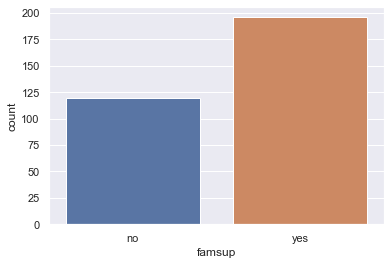

In [133]:
a_column = 'famsup'
first_acquaintance(a_column, df=stud)

In [134]:
stud.groupby(['mjob', 'fjob'])[a_column].value_counts()

mjob      fjob      famsup
at_home   at_home   no         2
                    yes        2
          health    no         1
                    yes        1
          other     yes       18
                    no        11
          services  no         7
                    yes        6
          teacher   no         1
health    health    yes        3
          other     yes       14
                    no         4
          services  no         2
                    yes        2
          teacher   yes        1
other     at_home   yes        3
                    no         2
          health    no         1
                    yes        1
          other     yes       44
                    no        40
          services  no         8
                    yes        6
          teacher   yes        5
                    no         1
services  at_home   yes        2
          health    yes        3
          other     yes       21
                    no        13
          servic

I have no clear idea how the missing values schoulf be filled without risk to distort the data. So I fill them with "unknown'. 

In [135]:
stud[a_column] = stud[a_column].apply(fill_unknown)

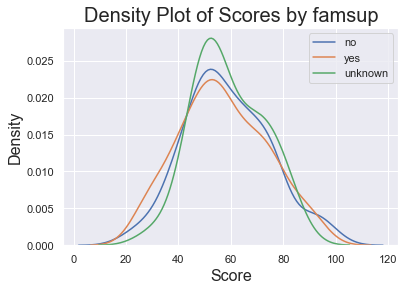

In [136]:
kdeplot_score(a_column, df=stud)

The variable does not seem to make as significant a difference in the distribution of the score. We exclude it from the model.

In [137]:
model_structure[a_column] = [0, 0]

# Column "paid"
## - additional paid lessons in mathematics (yes or no)

There are 36 missing values in the column "paid":

There are 2 unique values:
no     170
yes    146
Name: paid, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     316
unique      2
top        no
freq      170
Name: paid, dtype: object


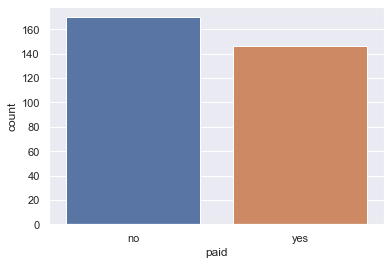

In [138]:
a_column = 'paid'
first_acquaintance(a_column, df=stud)

In [139]:
# filling themissing values with "unknown"
stud[a_column] = stud[a_column].apply(fill_unknown)

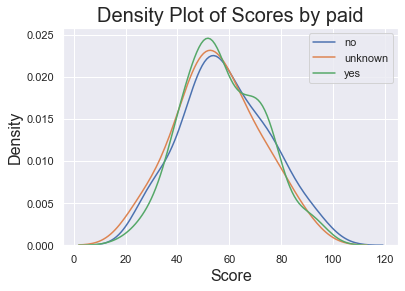

In [140]:
kdeplot_score(a_column, df=stud)

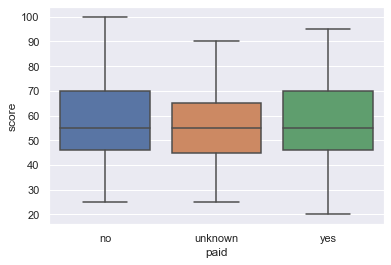

In [141]:
sns.boxplot(x=a_column, y='score', data=stud)

In [142]:
# We will obviosly exclude the  variable  from the model
model_structure[a_column][0] = 0

# Columns "activities"
## - additional extracurricular activities (yes or no)

There are 12 missing values in the column "activities":

There are 2 unique values:
yes    172
no     168
Name: activities, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     340
unique      2
top       yes
freq      172
Name: activities, dtype: object


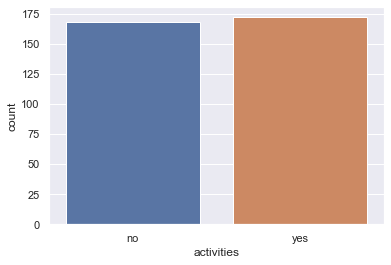

In [143]:
a_column = 'activities'
first_acquaintance(a_column, df=stud)

In [144]:
# filling the missing values with "unknown"
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "activities":

There are 3 unique values:
yes        172
no         168
unknown     12
Name: activities, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count     352
unique      3
top       yes
freq      172
Name: activities, dtype: object


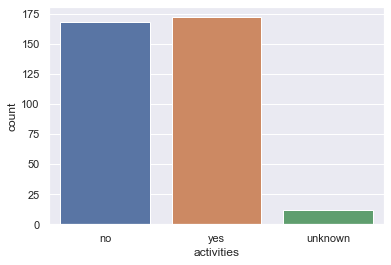

In [145]:
first_acquaintance(a_column, df=stud)

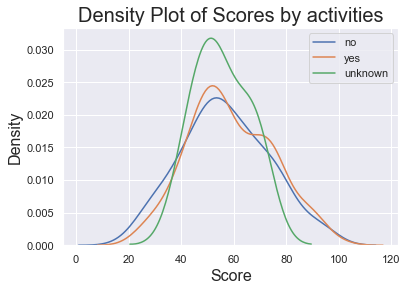

In [146]:
kdeplot_score(a_column, df=stud)

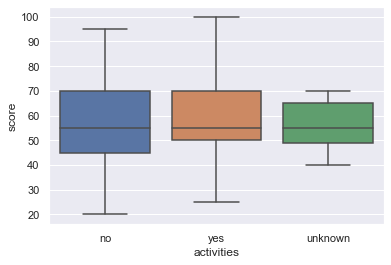

In [147]:
sns.boxplot(x=a_column, y='score', data=stud)

In [148]:
# I think we will exclude the variable from the model
model_structure[a_column][0] = 0

# Column "nursery"
## - attended kindergarten (yes or no)

There are 12 missing values in the column "nursery":

There are 2 unique values:
yes    272
no      68
Name: nursery, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     340
unique      2
top       yes
freq      272
Name: nursery, dtype: object


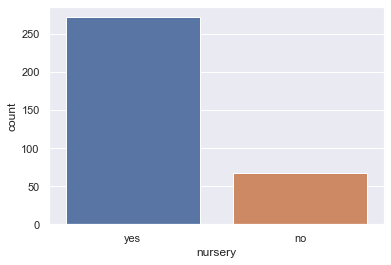

In [149]:
a_column = 'nursery'
first_acquaintance(a_column, df=stud)

In [150]:
# filling the missing values with 'yes'
stud[a_column] = stud[a_column].apply(fill_yes)

There are 0 missing values in the column "nursery":

There are 2 unique values:
yes    284
no      68
Name: nursery, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top       yes
freq      284
Name: nursery, dtype: object


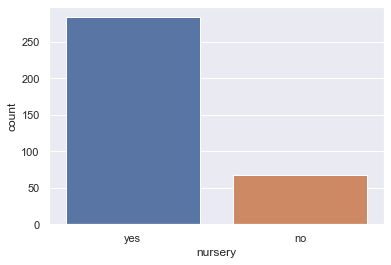

In [151]:
first_acquaintance(a_column, df=stud)

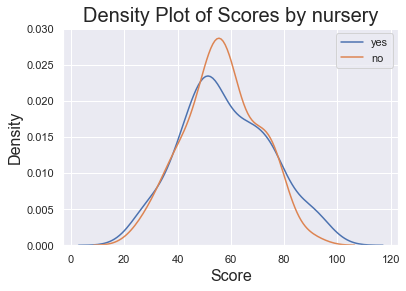

In [152]:
kdeplot_score(a_column, df=stud)

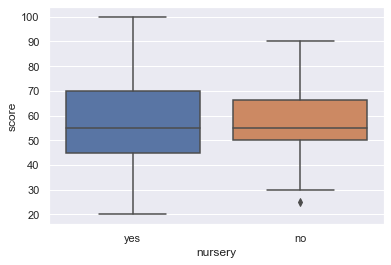

In [153]:
sns.boxplot(x=a_column, y='score', data=stud)

The variable doesn't influence the score. We will drop the column from the model.

In [154]:
model_structure[a_column][0] = 0

# Column "studytime, granular"
## - no description

There are 7 missing values in the column "studytime, granular":

There are 4 unique values:
-6.0     173
-3.0      90
-9.0      58
-12.0     24
Name: studytime, granular, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    345.000000
mean      -6.139130
std        2.522758
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64


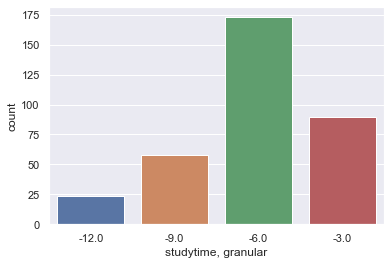

In [155]:
a_column = 'studytime, granular'
first_acquaintance(a_column, df=stud)

In [156]:
stud[['studytime', a_column]]

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
5,2.0,-6.0
6,2.0,-6.0
7,2.0,-6.0
8,2.0,-6.0
9,2.0,-6.0


Variables "studytime" and "studytime, granular" seem to be complete correlated.
Let's check.

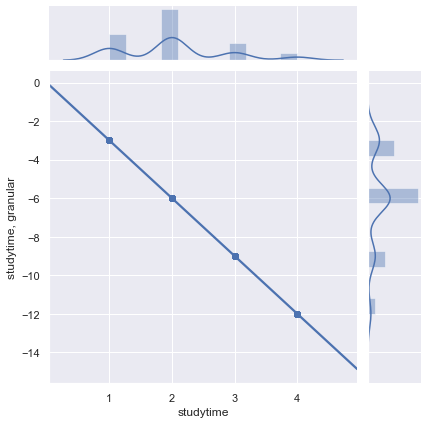

In [157]:
sns.jointplot('studytime', 'studytime, granular', stud, kind='reg')

Yes, it's right.  
We drop the column "studytime, granular" from the model.

In [158]:
model_structure.pop('studytime, granular', None)
stud.drop(['studytime, granular'], inplace=True, axis=1)

# Column "higher"
## wants to graduate (yes or no)

There are 19 missing values in the column "higher":

There are 2 unique values:
yes    320
no      13
Name: higher, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     333
unique      2
top       yes
freq      320
Name: higher, dtype: object


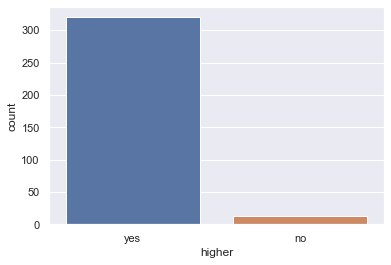

In [159]:
a_column = 'higher'
first_acquaintance(a_column, df=stud)

In [160]:
# fillin the missing values with "yes"
stud[a_column] = stud[a_column].apply(fill_yes)

There are 0 missing values in the column "higher":

There are 2 unique values:
yes    339
no      13
Name: higher, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top       yes
freq      339
Name: higher, dtype: object


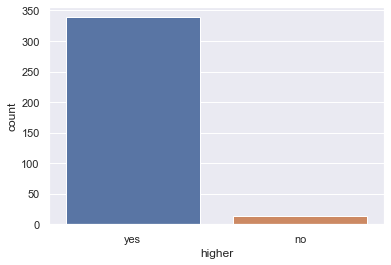

In [161]:
first_acquaintance(a_column, df=stud)

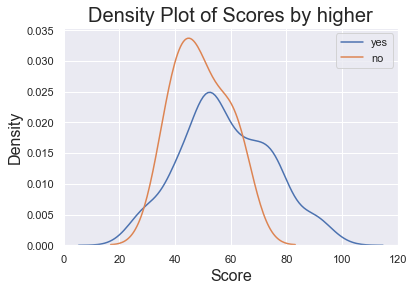

In [162]:
kdeplot_score(a_column, df=stud)

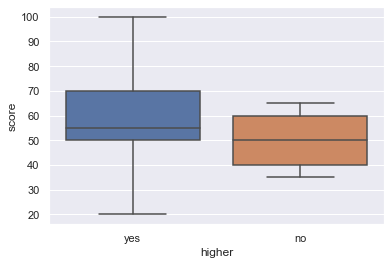

In [163]:
sns.boxplot(x=a_column, y='score', data=stud)

it's obviously important variable for the score. We have to include it into the model.

# Column "internet"
## - Internet at home (yes or no)

There are 29 missing values in the column "internet":

There are 2 unique values:
yes    274
no      49
Name: internet, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     323
unique      2
top       yes
freq      274
Name: internet, dtype: object


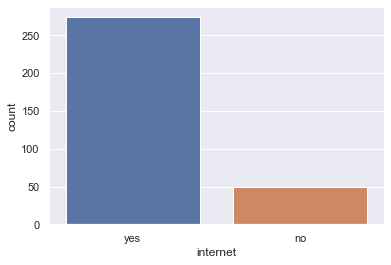

In [164]:
a_column = 'internet'
first_acquaintance(a_column, df=stud)

In [165]:
# fillin the missing values with "yes"
stud[a_column] = stud[a_column].apply(fill_yes)

There are 0 missing values in the column "internet":

There are 2 unique values:
yes    303
no      49
Name: internet, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     352
unique      2
top       yes
freq      303
Name: internet, dtype: object


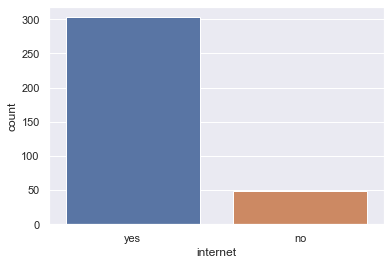

In [166]:
first_acquaintance(a_column, df=stud)

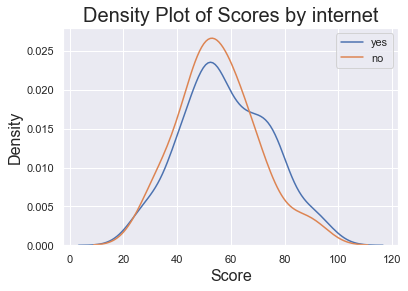

In [167]:
kdeplot_score(a_column, df=stud)

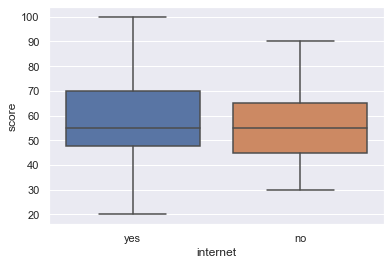

In [168]:
sns.boxplot(x=a_column, y='score', data=stud)

The variable doesn't influence the score. We will drop the column from the model without filling the missing values.

In [169]:
model_structure[a_column][0] = 0

# Column "romantic"
## - in a romantic relationship (yes or no)

There are 29 missing values in the column "romantic":

There are 2 unique values:
no     219
yes    104
Name: romantic, dtype: int64

Values that appear in the column more then 10 times: 2

Generate descriptive statistics:
 count     323
unique      2
top        no
freq      219
Name: romantic, dtype: object


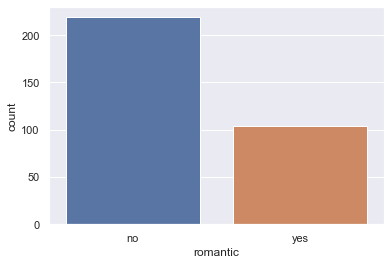

In [170]:
a_column = 'romantic'
first_acquaintance(a_column, df=stud)

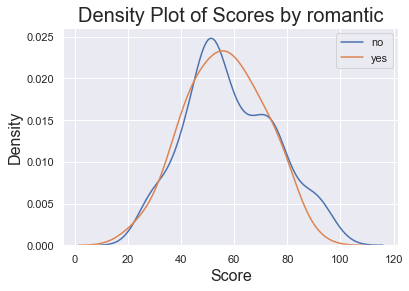

In [171]:
kdeplot_score(a_column, df=stud)

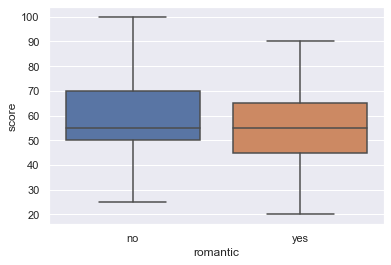

In [172]:
sns.boxplot(x=a_column, y='score', data=stud)

I would like to fill the missing values with the meaning "unknown" to prevent the distortion of the model

In [173]:
stud[a_column] = stud[a_column].apply(fill_unknown)

There are 0 missing values in the column "romantic":

There are 3 unique values:
no         219
yes        104
unknown     29
Name: romantic, dtype: int64

Values that appear in the column more then 10 times: 3

Generate descriptive statistics:
 count     352
unique      3
top        no
freq      219
Name: romantic, dtype: object


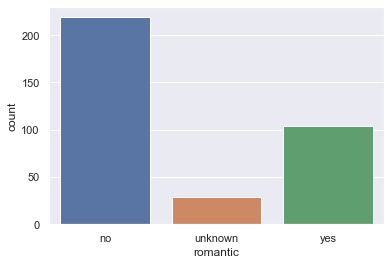

In [174]:
first_acquaintance(a_column, df=stud)

It seems the value of "romantic" has not a big impact on score.

In [175]:
model_structure[a_column][0] = 0

# Column  "famrel"
## family relationships (from 1 - very bad to 5 - very good)

There are 24 missing values in the column "famrel":

There are 6 unique values:
 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    328.000000
mean       3.942073
std        0.921871
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


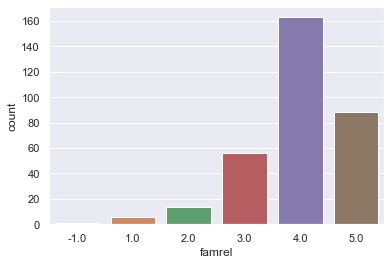

In [176]:
a_column  = 'famrel'
first_acquaintance(a_column, df=stud)

I interpret  value  "-1" as  a mistake and  replace  it with "1".   
I replace the missing values with "mode" and "mean"-value: 4.0.

In [177]:
stud[a_column] = stud[a_column].apply(lambda x: 1.0 if x == -1 else x)
stud[a_column] = stud[a_column].apply(lambda x: 4.0 if pd.isna(x) else x)

There are 0 missing values in the column "famrel":

There are 5 unique values:
4.0    187
5.0     88
3.0     56
2.0     14
1.0      7
Name: famrel, dtype: int64

Values that appear in the column more then 10 times: 4

Generate descriptive statistics:
 count    352.000000
mean       3.951705
std        0.864262
min        1.000000
25%        4.000000
50%        4.000000
75%        4.250000
max        5.000000
Name: famrel, dtype: float64


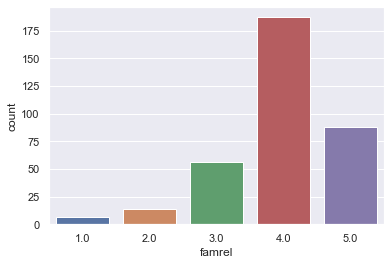

In [178]:
first_acquaintance(a_column, df=stud)

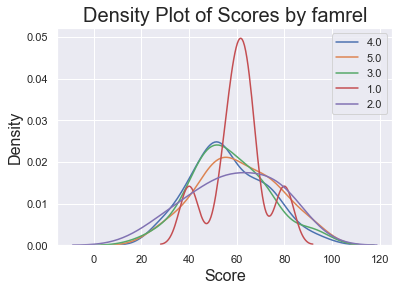

In [179]:
kdeplot_score(a_column, df=stud)

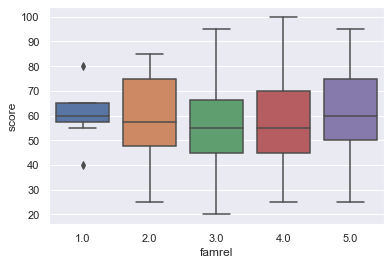

In [180]:
sns.boxplot(x=a_column, y='score', data=stud)

In [181]:
# We will consider the column as a categorical value:
model_structure[a_column][1] = 0

# Column "freetime"
## — free time after school (from 1 - very little to 5 - a lot)

There are 8 missing values in the column "freetime":

There are 5 unique values:
3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    344.000000
mean       3.235465
std        1.004258
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


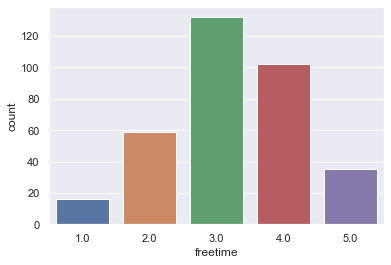

In [182]:
a_column = 'freetime'
first_acquaintance(a_column, df=stud)

In [183]:
# analyse the missing  values
st_list = [a_column, 'traveltime', 'studytime',
           'schoolsup', 'famsup', 'paid', 'activities']
stud[stud[a_column].isna()][st_list]

,freetime,traveltime,studytime,schoolsup,famsup,paid,activities
32,NaN,1.0,2.0,no,yes,no,yes
74,NaN,1.0,2.0,yes,yes,yes,yes
280,NaN,2.0,1.0,no,no,yes,yes
290,NaN,1.0,2.0,no,yes,yes,yes
291,NaN,1.0,3.0,no,yes,yes,no
311,NaN,3.0,2.0,no,yes,no,no
314,NaN,1.0,1.0,no,no,no,no
338,NaN,1.0,4.0,no,yes,no,no


In [184]:
stud[st_list]

,freetime,traveltime,studytime,schoolsup,famsup,paid,activities
0,3.0,2.0,2.0,yes,no,no,no
1,3.0,1.0,2.0,no,yes,no,no
2,3.0,1.0,2.0,yes,no,unknown,no
3,2.0,1.0,3.0,no,yes,yes,yes
4,3.0,1.0,2.0,no,yes,yes,no
5,4.0,1.0,2.0,no,yes,yes,yes
6,4.0,1.0,2.0,no,no,no,no
7,1.0,2.0,2.0,yes,yes,no,no
8,2.0,1.0,2.0,no,yes,yes,no
9,5.0,1.0,2.0,no,yes,yes,yes


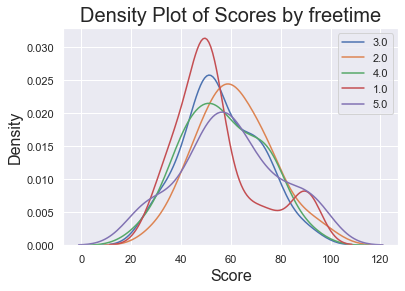

In [185]:
kdeplot_score(a_column, df=stud)

I couldn't find some dependencies  which could help  us to fill the missing values.
Let's fill them with  "mode"-value  = "median'-value:  3.0:

In [186]:
stud[a_column] = stud[a_column].apply(lambda x: 3.0 if pd.isna(x) else x)

There are 0 missing values in the column "freetime":

There are 5 unique values:
3.0    140
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    352.000000
mean       3.230114
std        0.993369
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


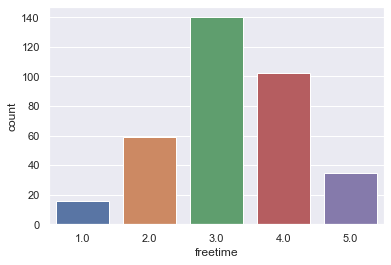

In [187]:
first_acquaintance(a_column, df=stud)

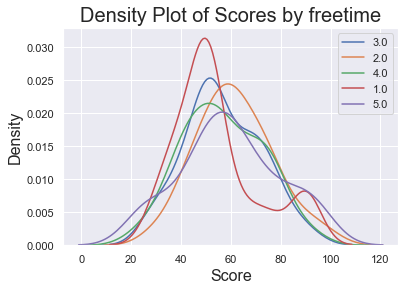

In [188]:
kdeplot_score(a_column, df=stud)

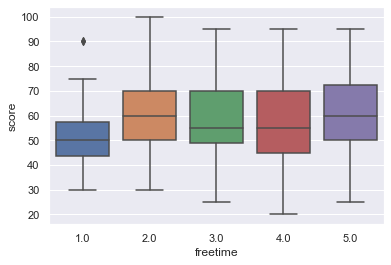

In [189]:
sns.boxplot(x=a_column, y='score', data=stud)

It seems the value of "freetime" can has some impact on score.

In [190]:
# we will consider the column as  a categorical  variable
model_structure[a_column][1] = 0

# Column "goout"
## - spending time with friends (from 1 - very little to 5 - a lot)

There are 6 missing values in the column "goout":

There are 5 unique values:
3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


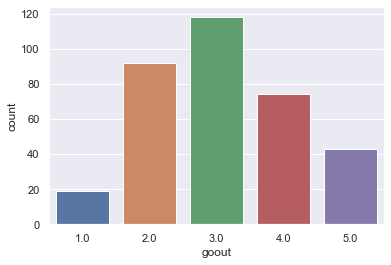

In [191]:
a_column = "goout"
first_acquaintance(a_column, df=stud)

I think we can fill the missing values with "mean" = "median" = "mode" value: 3.0

In [192]:
stud[a_column] = stud[a_column].apply(lambda x: 3.0 if pd.isna(x) else x)

There are 0 missing values in the column "goout":

There are 5 unique values:
3.0    124
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    352.000000
mean       3.085227
std        1.082683
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


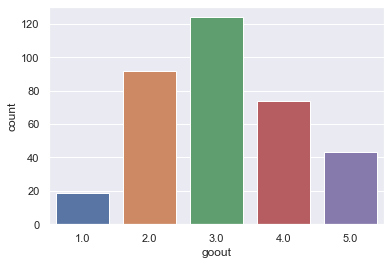

In [193]:
first_acquaintance(a_column, df=stud)

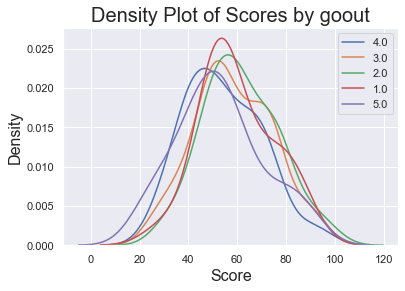

In [194]:
kdeplot_score(a_column, df=stud)

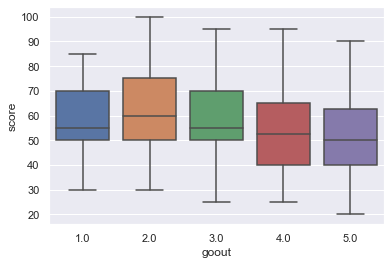

In [195]:
sns.boxplot(x=a_column, y='score', data=stud)

It seems the value of "freetime" can has some impact on score.

In [196]:
# we will consider the column as  a categorical  variable
model_structure[a_column][1] = 0

# Column "health "
## - current state of health (from 1 - very bad to 5 - very good)

There are 13 missing values in the column "health":

There are 5 unique values:
5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    339.000000
mean       3.516224
std        1.412812
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


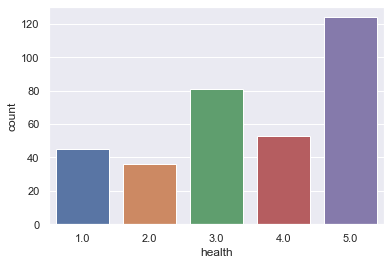

In [197]:
a_column = 'health'
first_acquaintance(a_column, df=stud)

I would like to proposle to fill the missing values with "median" value: 4.0

In [198]:
stud[a_column] = stud[a_column].apply(lambda x: 4.0 if pd.isna(x) else x)

There are 0 missing values in the column "health":

There are 5 unique values:
5.0    124
3.0     81
4.0     66
1.0     45
2.0     36
Name: health, dtype: int64

Values that appear in the column more then 10 times: 5

Generate descriptive statistics:
 count    352.000000
mean       3.534091
std        1.389409
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


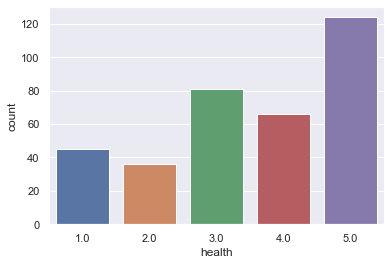

In [199]:
first_acquaintance(a_column, df=stud)

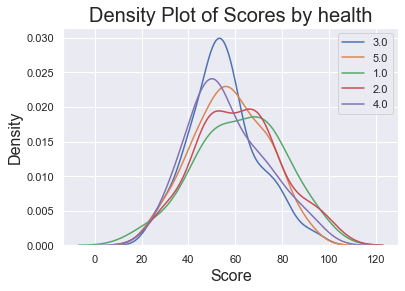

In [200]:
kdeplot_score(a_column, df=stud)

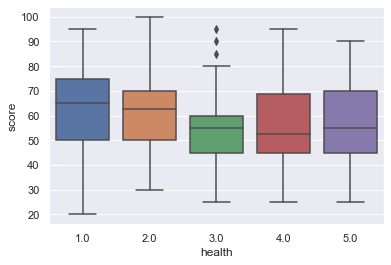

In [201]:
sns.boxplot(x=a_column, y='score', data=stud)

It's interesting to see the descending trend of the mean score. It could mean the students with a very good  health are concentrated on the  sport  not on  math.

In [202]:
# we will consider the column as  a categorical  variable
model_structure[a_column][1] = 0

#  Column "absences "
## - number of missed lessons

There are 10 missing values in the column "absences":

There are 36 unique values:
0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

Values that appear in the column more then 10 times: 8

Generate descriptive statistics:
 count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


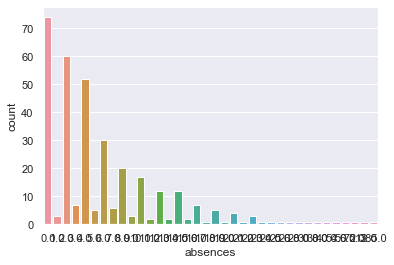

In [203]:
a_column = 'absences'
first_acquaintance(a_column, df=stud)

25th quantile: 2.0
 75th quantile: 8.0
 IQR: 6.0
 limits of outliers: [-7.0, 17.0]


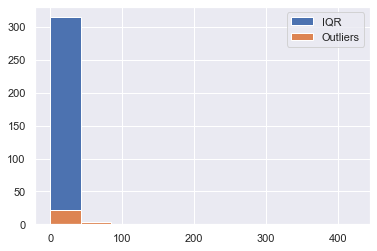

In [204]:
quartile_analysis(a_column, df=stud)

I would like to replace all outliers (values >  17.0) with 17.0 and  to fill the missing values with  median: 4.0:

In [205]:
stud[a_column] = stud[a_column].apply(lambda x: 17.0 if x > 17.0 else x)
stud[a_column] = stud[a_column].apply(lambda x: 4.0 if pd.isna(x) else x)

There are 0 missing values in the column "absences":

There are 18 unique values:
0.0     74
4.0     62
2.0     60
6.0     30
17.0    28
8.0     20
10.0    17
12.0    12
14.0    12
16.0     7
3.0      7
7.0      6
5.0      5
9.0      3
1.0      3
13.0     2
15.0     2
11.0     2
Name: absences, dtype: int64

Values that appear in the column more then 10 times: 9

Generate descriptive statistics:
 count    352.000000
mean       5.607955
std        5.322611
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       17.000000
Name: absences, dtype: float64


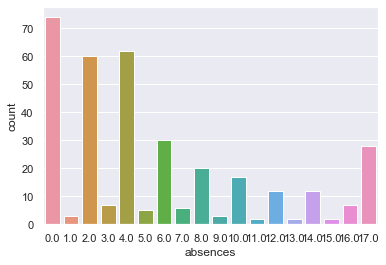

In [207]:
first_acquaintance(a_column, df=stud)

We can notice disproportionately less numbers of odd values.
It could mean, that normally the student skip the full lectures,  which consist  from two  academy hours.  I woul propose to round the odd values to the nearest higher even number.

In [208]:
stud[a_column] = stud[a_column].apply(lambda x: (x+1) if x % 2 == 1 else x)

There are 0 missing values in the column "absences":

There are 10 unique values:
0.0     74
4.0     69
2.0     63
6.0     35
18.0    28
8.0     26
10.0    20
12.0    14
14.0    14
16.0     9
Name: absences, dtype: int64

Values that appear in the column more then 10 times: 9

Generate descriptive statistics:
 count    352.000000
mean       5.772727
std        5.517602
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       18.000000
Name: absences, dtype: float64


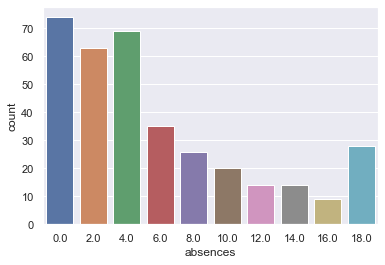

In [209]:
first_acquaintance(a_column, df=stud)

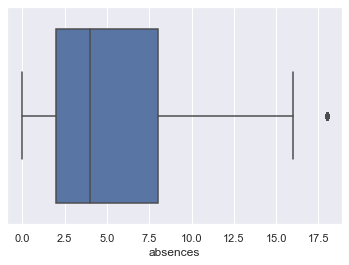

In [210]:
sns.boxplot(stud[a_column])

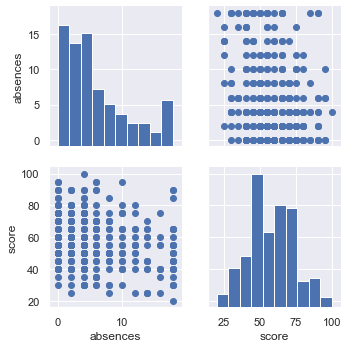

In [212]:
g = sns.PairGrid(stud, vars=[a_column, "score"])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

We can notice some interconnection between "absences" and  "score".
We don't exclude  the "absences"-variable from the model  on this step. 

The Data Cleaning is finished!

In [213]:
# check the data set:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 29 columns):
school        352 non-null object
sex           352 non-null object
age           352 non-null int64
address       352 non-null object
famsize       352 non-null object
pstatus       352 non-null object
medu          352 non-null float64
fedu          352 non-null float64
mjob          352 non-null object
fjob          352 non-null object
reason        352 non-null object
guardian      352 non-null object
traveltime    352 non-null float64
studytime     352 non-null float64
failures      332 non-null float64
schoolsup     352 non-null object
famsup        352 non-null object
paid          352 non-null object
activities    352 non-null object
nursery       352 non-null object
higher        352 non-null object
internet      352 non-null object
romantic      352 non-null object
famrel        352 non-null float64
freetime      352 non-null float64
goout         352 non-null float64
heal

In [214]:
model_structure

{'school': [0, 0],
 'sex': [1, 0],
 'age': [1, 1],
 'address': [1, 0],
 'famsize': [1, 0],
 'pstatus': [1, 0],
 'medu': [1, 0],
 'fedu': [1, 0],
 'mjob': [1, 0],
 'fjob': [1, 0],
 'reason': [1, 0],
 'guardian': [1, 0],
 'traveltime': [1, 0],
 'studytime': [1, 0],
 'failures': [0, 0],
 'schoolsup': [1, 0],
 'famsup': [0, 0],
 'paid': [0, 0],
 'activities': [0, 0],
 'nursery': [0, 0],
 'higher': [1, 0],
 'internet': [0, 0],
 'romantic': [0, 0],
 'famrel': [1, 0],
 'freetime': [1, 0],
 'goout': [1, 0],
 'health': [1, 0],
 'absences': [1, 1],
 'score': [1, 1]}

In [215]:
# prepearing of lists for quantitative variables and for categorocal variables
list_quant = []  # list of quantitative variables
list_cat = []  # list of categorocal variables
for col, lst in model_structure.items():
    if lst[1] == 1:
        list_quant.append(col)
    else:
        list_cat.append(col)

# Part II. Correlation analysis of quantitative variables
In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient.

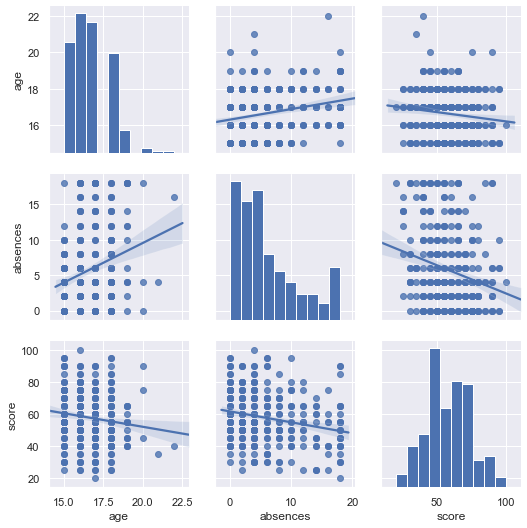

In [216]:
sns.pairplot(stud[list_quant], kind='reg')

In [217]:
correlation = stud[list_quant].corr()
correlation

,age,absences,score
age,1.000000,0.254341,-0.131542
absences,0.254341,1.000000,-0.233604
score,-0.131542,-0.233604,1.000000


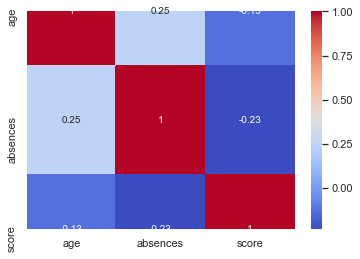

In [218]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In fact there are two variables weakly correlated with the score: "age" and "absences".  
Both have a negative corralation with a score and both we can iclude in the predictive model. 

In [219]:
columns_for_model = []
for col in list_quant:
    columns_for_model.append(col)
print(columns_for_model)

['age', 'absences', 'score']


# Part III. Analysis of nominative variables.
We made the first analysis for each nominative variables during the Data Cleaning and and noticed, wich of them could be likely  included in the predictive model:  

In [220]:
print('This nominative variables could be likely included in the predictive model:')
for col in list_cat:
    if model_structure[col][0] == 1:
        print(col, model_structure[col])

This nominative variables could be likely included in the predictive model:
sex [1, 0]
address [1, 0]
famsize [1, 0]
pstatus [1, 0]
medu [1, 0]
fedu [1, 0]
mjob [1, 0]
fjob [1, 0]
reason [1, 0]
guardian [1, 0]
traveltime [1, 0]
studytime [1, 0]
schoolsup [1, 0]
higher [1, 0]
famrel [1, 0]
freetime [1, 0]
goout [1, 0]
health [1, 0]


In [221]:
print('This nominative variables could be likely excluded from the predictive model:')
for col in list_cat:
    if model_structure[col][0] == 0:
        print(col, model_structure[col])

This nominative variables could be likely excluded from the predictive model:
school [0, 0]
failures [0, 0]
famsup [0, 0]
paid [0, 0]
activities [0, 0]
nursery [0, 0]
internet [0, 0]
romantic [0, 0]


But to make a decision which nominative variables have to be included in the predictive model we have to use a statistical methods.
Let's check if there is a statistical difference in the distribution of the score by nominative characteristics using the Student's test. Let us test the null hypothesis that the distributions of the score by various parameters are indistinguishable:

In [222]:
# Student's test
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # The Bonferroni correction
            print(
                'The statistically significant differences for this column are found:', column)
            columns_for_model.append(column)
            list_nom.append(column)
            break

In [223]:
list_nom = []
for col in list_cat:
    get_stat_dif(col)
print(
    f'There are {len(list_nom)} categorical variables to include in the predictive model.')

The statistically significant differences for this column are found: address
The statistically significant differences for this column are found: medu
The statistically significant differences for this column are found: fedu
The statistically significant differences for this column are found: mjob
The statistically significant differences for this column are found: fjob
The statistically significant differences for this column are found: studytime
The statistically significant differences for this column are found: failures
The statistically significant differences for this column are found: schoolsup
The statistically significant differences for this column are found: goout
There are 9 categorical variables to include in the predictive model.


We will include a variable "failures" in the model, but it necessary to notice, that there could be a problem with this parameter, then too many values with "0"-meaning would mean 4 or more failures.
But it could be very helpfull to have separatly category for null number of extracurricular failures and for 4 and more. 

In [224]:
# Let's prepare a data set for the model for the future processing:
stud_for_model = stud[columns_for_model]
stud_for_model.head()

,age,absences,score,address,medu,fedu,mjob,fjob,studytime,failures,schoolsup,goout
0,18,6.0,30.0,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0
1,17,4.0,30.0,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0
2,15,10.0,50.0,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0
3,15,2.0,75.0,U,4.0,2.0,health,other,3.0,0.0,no,2.0
4,16,4.0,50.0,U,3.0,3.0,other,other,2.0,0.0,no,2.0


In [225]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 12 columns):
age          352 non-null int64
absences     352 non-null float64
score        352 non-null float64
address      352 non-null object
medu         352 non-null float64
fedu         352 non-null float64
mjob         352 non-null object
fjob         352 non-null object
studytime    352 non-null float64
failures     332 non-null float64
schoolsup    352 non-null object
goout        352 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 45.8+ KB


# Part 4. Conclusions

In this notebook, we carried out the first two steps of a machine learning problem:
1. Cleaned and formatted the raw data 
2. Performed an exploratory data analysis  
   
So, as a result of the EDA to analyze the influence of students parameters on the mathimatic test score, the following conclusions are made:
1. There were quite few missing values in the data, but almost all column had them.  
2. There are few outliers in the data, the data are pretty clean.  
3. A negative correlation between the age parameter and score indicate that the score deteriorate with the age.  
4. A negative correlation between the absences parameter and score indicate that skipping lectures has negative  influence on the  score.  
5.  The most important parameters that are proposed to be used in the future for building the model are:  

In [226]:
columns_for_model

['age',
 'absences',
 'score',
 'address',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'studytime',
 'failures',
 'schoolsup',
 'goout']